# Algoritmos Supervisionados

## Regressão linear simples

### Etapas do projeto
<ul>
    <li><input type="checkbox" checked> 01 > Carregar os dados</li>
    <li><input type="checkbox" checked> 02 > Realizar EDA</li>
    <li><input type="checkbox" checked> 03 > Preparar Dataset para treino e teste</li>
    <li><input type="checkbox" checked> 04 > Treinar modelo</li>
    <li><input type="checkbox"> 05 > Validar modelo
        <ul>
            <li><input type="checkbox"> Métricas</li>
            <li><input type="checkbox"> Análise de resíduos</li>
        </ul>
    </li>
    <li><input type="checkbox"> 06 > Salvar modelo</li>
    <li><input type="checkbox"> 07 > Entregar modelo via API</li>
</ul>


In [1]:
# Import required libs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# 01 > CARREGAR OS DADOS

In [2]:
df_pontuacao = pd.read_csv('./datasets/pontuacao_test.csv')
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [3]:
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


# 02 > Realizar o EDA

In [4]:
# Medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

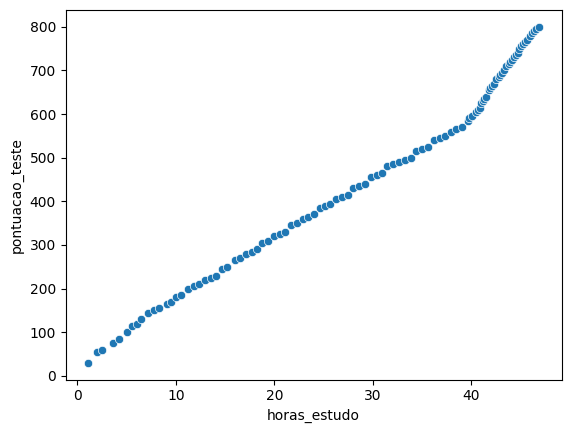

In [5]:
# Como estas variáveis se relacionam? Podemos plotar uma dispersão, onde:
# X = horas de estudo
# y = pontuação do teste
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

- Não dá para traçar uma reta, mas está claro que existe uma relação bem clara entre horas de estudo e pontuação.

<Axes: ylabel='horas_estudo'>

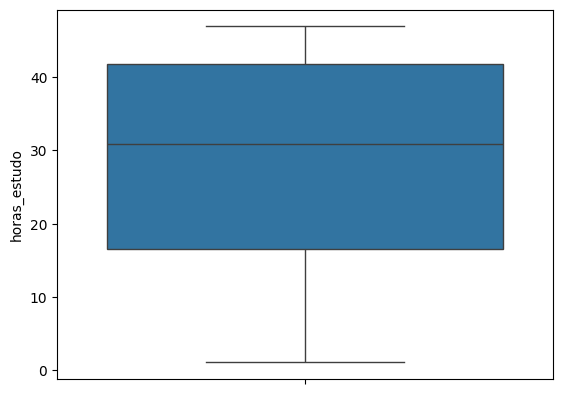

In [6]:
# Será que temos outliers?

# Verificar em horas de estudo
sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

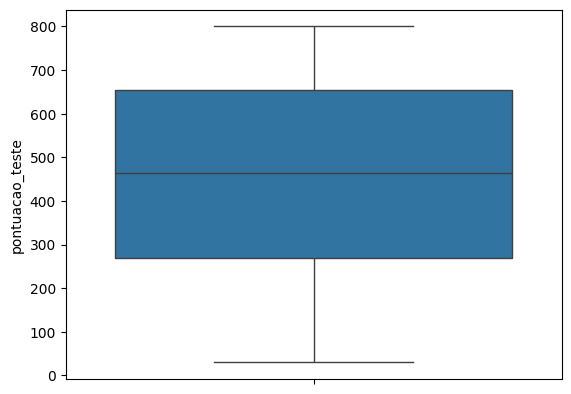

In [7]:
# Verificar em pontuação
sns.boxplot(df_pontuacao, y='pontuacao_teste')

- Não temos outliers em nossa base de análise

<Axes: >

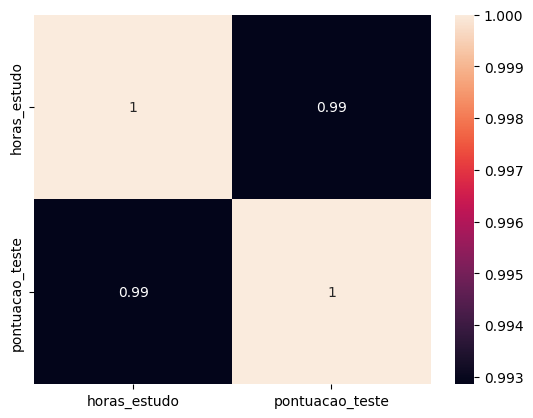

In [8]:
# Vamos agora avaliar a correlação das nossas variáveis do modelo

# Correlação de Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

- Temos 0.99, isso é uma correlação muito forte

<Axes: >

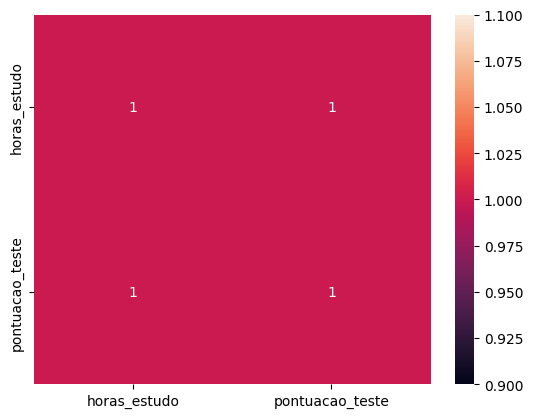

In [9]:
# Correlação de Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

- Com o modelo spearman, a correlação foi máxima, bateu em 1!

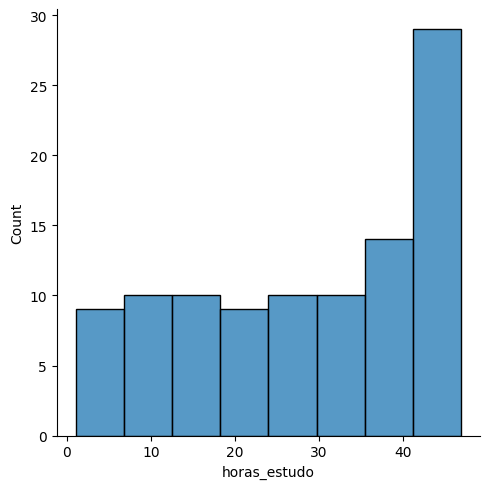

In [10]:
# Vamos estudar a distribuição dos dados, e com 2 variáveis, um histograma ajuda muito a entender como elas estão concentradas
# Pois para uma regressão, temos que pensar em eliminar resíduos, e é importante avaliar onde os dados ficam mais concentrados
sns.displot(df_pontuacao, x='horas_estudo')

- Está muito clara a concentração de dados acima de 40h de estudo
- Isto representa que a maior parte da população desta análise está dentro deste volume de horas, e como vimos que temos uma correlação clara, isso impacta na regressão linear com muitos resíduos neste ponto (isto já tinha ficado claro no gráfico de dispersão anterior, com a reta tendendo para cima em curva)

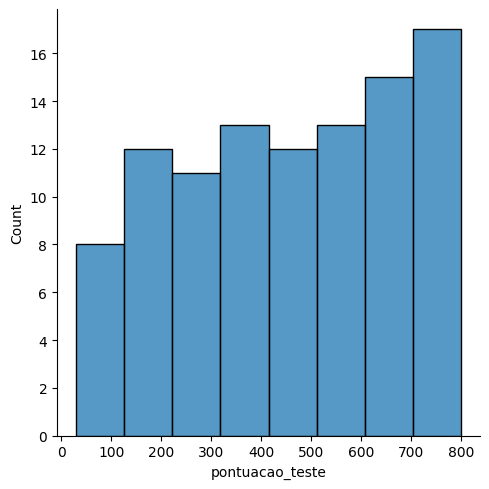

In [11]:
# Agora para a pontuação do teste
sns.displot(df_pontuacao, x='pontuacao_teste')

- Temos algo bem mais linear aqui, sem uma concentração nítida

# 03 > Preparar Dataset para treino e teste

In [12]:
# Quando temos apenas 1 feature (tempo de estudo), a gente faz um reshape.
from sklearn.model_selection import train_test_split
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

# Agora a gente faz o split para o teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# 04 > Treinar modelo

In [13]:
# Temos 30% para testes e 70% para treino, vamos iniciar o treinamento
# Instanciar o modelo para treino
reg_model = LinearRegression()

# Treinar o modelo
reg_model.fit(X_train, y_train)

# Imprimir a equação da reta para a nossa regressão
# y = aX + b
print("A equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 15.642619x + 8.476601


# 05 > Validar modelo

## Métricas

In [14]:
# Vamos conferir se nosso modelo está fazendo boas previsões

# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

# Com os valores de previsão criados, vamos comparar com os valores reais
# Para isso, podemos fazer com base no R-squared (Coeficiente de determinação)
# Quanto mais próximo de 1, melhor a previsão
# Ele representa a proporção na variação na variável dependente que é explicada pela variável independente

# Importar as métricas que vamos usar na validação
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

r2_score(y_test, y_pred)



0.9828400452912442

- Temos um valor bem alto e próximo de 1, o que indica uma boa previsão
- Nosso modelo funcionou bem, quase 99%

In [15]:
# Vamos avaliar agora com base nos erros
# MAE (Mean Absolute Error)
# É uma métrica fácil de interpretar, na escala da nossa variável dependente
# O MAE é menos sensível a outliers
mean_absolute_error(y_test, y_pred)

22.957470277134615

- Temos praticamente 23 pontos de erro
- Um exame que tem o range de 0 à 800, 23 de margem de erro pode ser bem aceitável para a predição

In [16]:
# Também podemos calcular o MSE (Mean Squared Error)
# Não é uma métrica fácil de interpretar, ela é mais sensível à outliers e penaliza grandes erros
# Ele é muito usado como uma métrica alvo para abaixar seu valor para melhorar modelos de redes neurais
mean_squared_error(y_test, y_pred)

766.9972992416427

In [17]:
# Podemos puxar uma métrica que é mais fácil de interpretar, e também penaliza grandes erros
# No caso o RMSE, que é a raiz quadrada do erro médio
root_mean_squared_error(y_test, y_pred)

27.69471608884342

- Agora podemos ver que a margem de erro subiu para quase 28, mas ainda pode ser aceitável

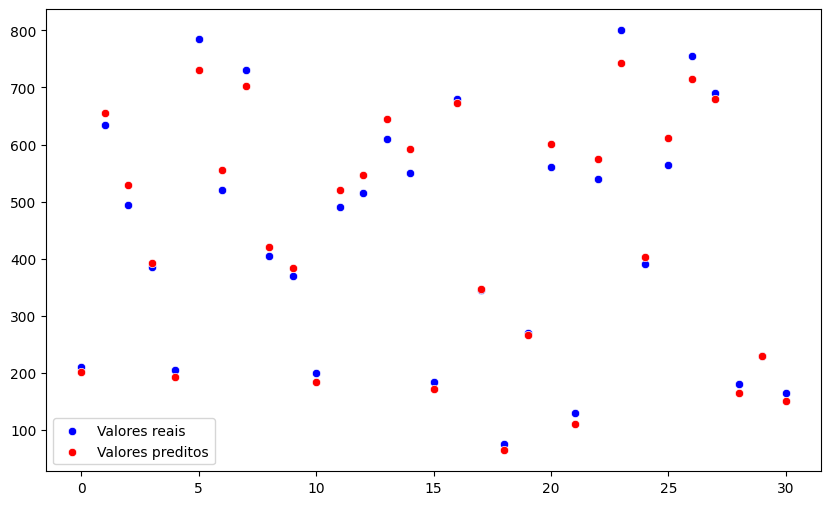

In [18]:
# Fazer uma análise gráfica para entender melhor nossas métricas
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
# Para os valores reais
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores reais')
# Para os valores preditos
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores preditos')

plt.legend()
plt.show()

## Análise de resíduos

In [19]:
# Vamos calcular os resíduos
residuos = y_test - y_pred

In [20]:
# Vamos converter os resíduos para conseguir plotar eles

# Calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (X - media) / desvio padrão

from scipy.stats import zscore

residuos_std = zscore(residuos)

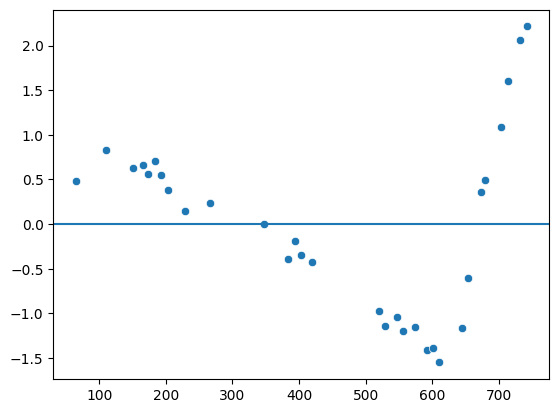

In [21]:
# Primeiro teste: Verificar linearidade do modelo
# Se os resíduos estiverem entre -2 e +2 na escala padrão, isso indica linearidade do modelo.

# Segundo teste: Verificar a homogeneidade das variâncias (Homocedasticidade)
# Valores que estiver em torno da reta, temos homocedasticidade, caso contrário
# se tivermos alguma tendência ou padrão (formam um cone, funil), já Heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

- Grande parte dos valores estão entre -2/+2
- Era previsto, pois acima de 40h de estudos a gente tinha um volume muito grande de dados
- Isso indica que não tem Linearidade, por conta de ter valores fora da escala
- E também temos Heterocedasticidade, pois não temos a presença dos dados próximos da reta

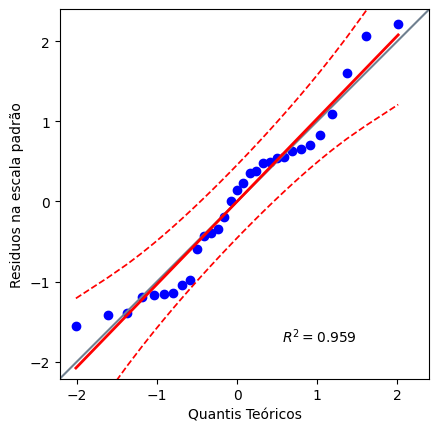

In [22]:
# Vamos agora checar se os resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, que avalia se uma amostra segue a distribuição normal

import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Residuos na escala padrão')
plt.show()

- Temos valores quase saindo da margem de confiança
- Nosso modelo não vai fazer boas predições

In [23]:
# Executar o teste de Normalidade - Shapiro Wilk
# H0: Nosso resíduo segue uma distribuição normal (p-value > 0.05)
# H1: Nosso resíduo não segue uma distribuição normal (p-value <= 0.05)

stat_shapiro, p_value = shapiro(residuos.reshape(-1))
print("Estatística do teste {} e p-value: {}".format(stat_shapiro, p_value))

Estatística do teste 0.9500532226161759 e p-value: 0.15663817850304967


- Com o p-value > 0.05, nós não rejeitamos H0, ou seja, nosso resíduo segue uma distribuição normal

In [24]:
# Executar o teste de Normalidade - Kolmogorov-Smirnov
# H0: Nosso resíduo segue uma distribuição normal (p-value > 0.05)
# H1: Nosso resíduo não segue uma distribuição normal (p-value <= 0.05)

stat_ks, p_value_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatística do teste {} e p-value: {}".format(stat_ks, p_value_ks))

Estatística do teste 0.48355808450512827 e p-value: 3.395368995814077e-07


- De acordo com KS, o p-value foi muito menor que 0.05, então rejeitamos H0

# Conclusão

- Dentro do universo de dados que temos, o modelo até teve uma performance aceitável
- Tendo mais dados, e fazendo um split com kfold, poderíamos buscar um treinamento melhor
- Fica claro nos testes de resíduos Shapiro e Kolmogorov, que com os poucos dados que temos, o modelo não parece ser viável para previsões assertivas.